In [1]:
from scipy.linalg import eigh
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

(720, 893)


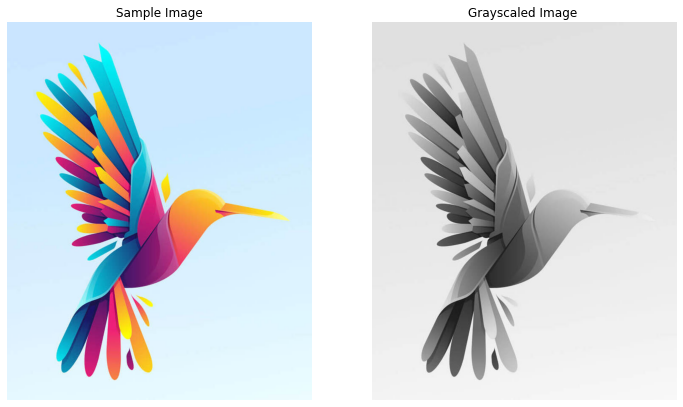

In [2]:


sample_img=Image.open("bird.jpg")
print(sample_img.size)

# Plotting the sample image and grayscaled image side by side
fig,[img1,img2] = plt.subplots(1,2,figsize=(12,10))

img1.imshow(sample_img)
img1.axis('off')
img1.set_title("Sample Image")

grayscale_img=sample_img.convert('LA')
img2.imshow(grayscale_img)
img2.axis('off')
img2.set_title("Grayscaled Image ")
plt.savefig("sample image.png")

Matrix Shape :  (893, 720)


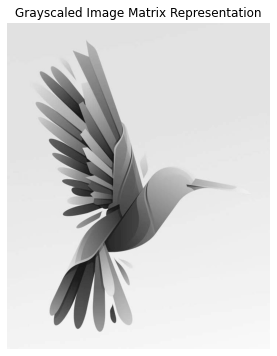

In [3]:

#converting the grayscale image to numpy matrix
grayscale_matrix=np.array(list(grayscale_img.getdata(band=0)),float)

grayscale_matrix.shape=(grayscale_img.size[1],grayscale_img.size[0])

# Display image 
plt.figure(figsize=(8,6))
print('Matrix Shape : ',grayscale_matrix.shape)
plt.imshow(grayscale_matrix,cmap='gray')
plt.axis('off')
plt.title("Grayscaled Image Matrix Representation")
plt.show()

In [4]:
def pca(image_matrix):

  # Calculating the center matrix 
  centered_matrix = image_matrix - np.mean(image_matrix,axis=0)

  # Calculating the covariance matrix
  covariance_matrix=np.cov(centered_matrix,rowvar = False)

  print("Covariance matrix shape :  ",covariance_matrix.shape)
  print("np.mean shape :", np.mean(image_matrix,axis=0).shape)

  # Computing the eigen values and eigen vectors for the sample
  eigen_values,eigen_vectors=np.linalg.eigh(covariance_matrix) 

  # Size of eigen vector
  eigen_vectors_dimensions=np.size(eigen_vectors,axis=0)

  # Sorting eigen values
  sorted_indices=np.argsort(eigen_values)
  sorted_indices=sorted_indices[::-1]
 
  # Choosing eigen vector coresponding to order of eigen value
  eigen_vectors=eigen_vectors[:,sorted_indices]
  eigen_values=eigen_values[sorted_indices]

  return eigen_values,eigen_vectors,covariance_matrix,centered_matrix


In [5]:
eigen_values,eigen_vectors,covariance_matrix,centered_matrix=pca(grayscale_matrix)

Covariance matrix shape :   (720, 720)
np.mean shape : (720,)


[40.4 23.2  7.1  4.5  4.   2.7  2.5  1.9  1.3  1.   0.9  0.8  0.8  0.7
  0.6  0.5  0.4  0.4  0.4  0.3  0.3  0.3  0.3  0.2  0.2  0.2  0.2  0.2
  0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]


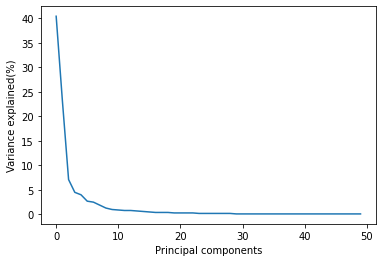

In [6]:
variance_ratio = eigen_values/np.sum(eigen_values)
print(variance_ratio.round(3)[:50] * 100)
plt.plot(variance_ratio.round(3)[:50] * 100)
plt.ylabel('Variance explained(%)')
plt.xlabel('Principal components')
plt.show()

[40.4 63.6 70.7 75.1 79.1 81.8 84.3 86.2 87.5 88.6 89.5 90.3 91.  91.7
 92.3 92.8 93.2 93.6 94.  94.3 94.6 94.9 95.2 95.5 95.7 95.9 96.1 96.3
 96.4 96.6 96.7 96.9 97.  97.1 97.2 97.3 97.4 97.5 97.6 97.7 97.8 97.9
 97.9 98.  98.1 98.1 98.2 98.2 98.3 98.3]


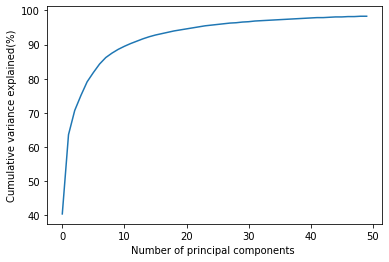

In [23]:
cumulative_variance_ratio=np.cumsum(eigen_values)/np.sum(eigen_values)
print(cumulative_variance_ratio.round(3)[:50]*100)
plt.plot(cumulative_variance_ratio.round(3)[:50]*100)
plt.ylabel('Cumulative variance explained(%)')
plt.xlabel('Number of principal components ')
plt.savefig("Cummulative variance explained by number of components.png")
plt.show()


In [8]:
def compress_img(image_matrix,value,eigen_values,eigen_vectors,centered_matrix):
  total_dimensions = image_matrix.shape[1];
  required_dimensions = int(value / 100 * total_dimensions)
  
  if required_dimensions < total_dimensions or required_dimensions > 0 :
    eigen_vectors=eigen_vectors[:,range(required_dimensions)]
  

  # Reconstruct the image using dot product of eigen vector and covariance matrix
  score=np.dot(centered_matrix,eigen_vectors)
  compressed_image=np.dot(score,eigen_vectors.T) + np.mean(image_matrix,axis=0)
  
  return compressed_image

In [9]:
img1=compress_img(grayscale_matrix,1,eigen_values,eigen_vectors,centered_matrix)

In [10]:
img2=compress_img(grayscale_matrix,3,eigen_values,eigen_vectors,centered_matrix)

In [11]:
img3=compress_img(grayscale_matrix,5,eigen_values,eigen_vectors,centered_matrix)

In [12]:
img4=compress_img(grayscale_matrix,10,eigen_values,eigen_vectors,centered_matrix)

In [13]:
img5=compress_img(grayscale_matrix,20,eigen_values,eigen_vectors,centered_matrix)

In [14]:
img6=compress_img(grayscale_matrix,30,eigen_values,eigen_vectors,centered_matrix)

In [15]:
img7=compress_img(grayscale_matrix,40,eigen_values,eigen_vectors,centered_matrix)

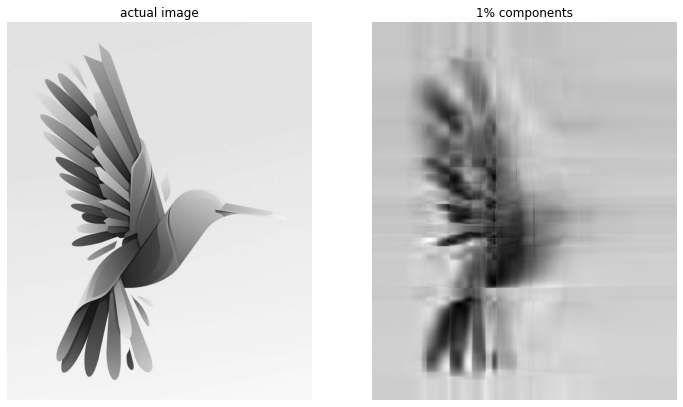

In [16]:
fig, [ax0,ax1] = plt.subplots(1,2,figsize=(12,10))

ax0.axis('off')
ax0.imshow(grayscale_matrix,cmap=plt.get_cmap('gray'))
ax0.set_title('actual image')

#ax0.text(0,0,"Image size : "+str(img_mat.shape),size='xx-large',va='bottom')
ax1.axis('off')
ax1.imshow(img1,cmap=plt.get_cmap('gray'))
ax1.set_title('1% components')
plt.savefig("1% components.png")
plt.show()


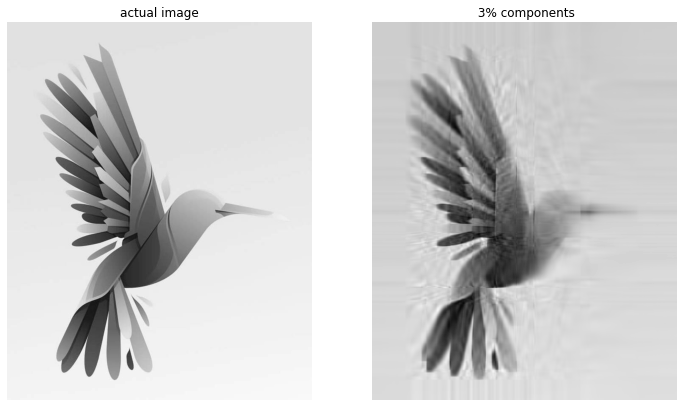

In [17]:
fig, [ax0,ax2] = plt.subplots(1,2,figsize=(12,10))

ax0.axis('off')
ax0.imshow(grayscale_matrix,cmap=plt.get_cmap('gray'))
ax0.set_title('actual image')

ax2.axis('off')
ax2.imshow(img2,cmap=plt.get_cmap('gray'))
ax2.set_title(' 3% components')

plt.savefig("3% components.png")
plt.show()

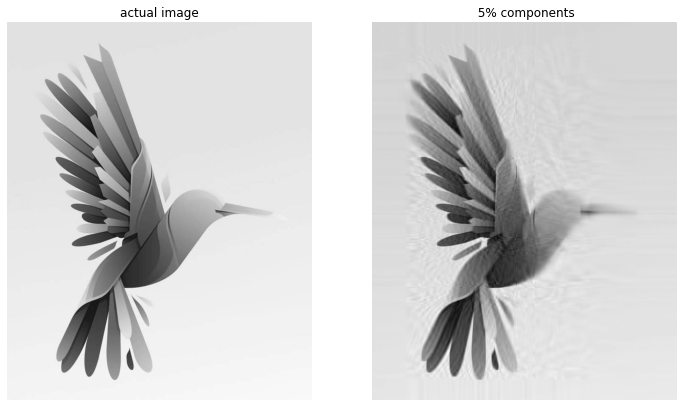

In [18]:
fig, [ax0,ax3] = plt.subplots(1,2,figsize=(12,10))

ax0.axis('off')
ax0.imshow(grayscale_matrix,cmap=plt.get_cmap('gray'))
ax0.set_title('actual image')

ax3.axis('off')
ax3.imshow(img3,cmap=plt.get_cmap('gray'))
ax3.set_title(' 5% components')

plt.savefig("5% components.png")
plt.show()

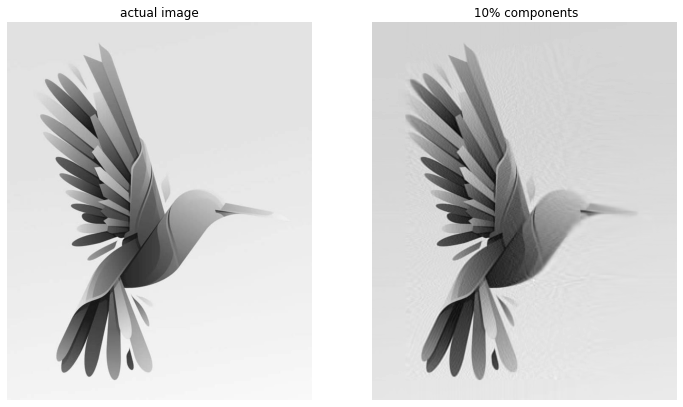

In [19]:
fig, [ax0,ax4] = plt.subplots(1,2,figsize=(12,10))

ax0.axis('off')
ax0.imshow(grayscale_matrix,cmap=plt.get_cmap('gray'))
ax0.set_title('actual image')

ax4.axis('off')
ax4.imshow(img4,cmap=plt.get_cmap('gray'))
ax4.set_title(' 10% components')

plt.savefig("10% components.png")
plt.show()

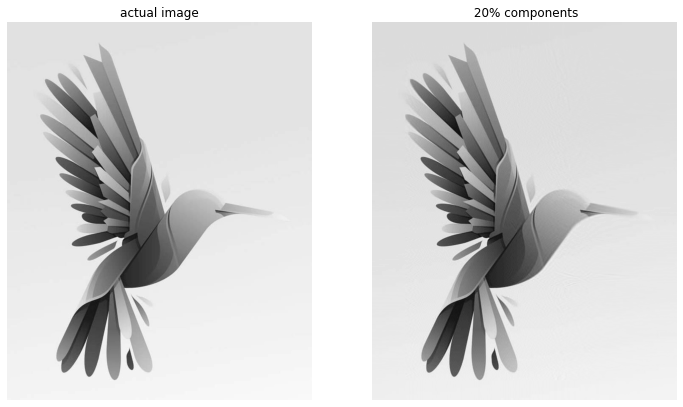

In [20]:
fig, [ax0,ax5] = plt.subplots(1,2,figsize=(12,10))

ax0.axis('off')
ax0.imshow(grayscale_matrix,cmap=plt.get_cmap('gray'))
ax0.set_title('actual image')

ax5.axis('off')
ax5.imshow(img5,cmap=plt.get_cmap('gray'))
ax5.set_title(' 20% components')

plt.savefig("20% components")
plt.show()

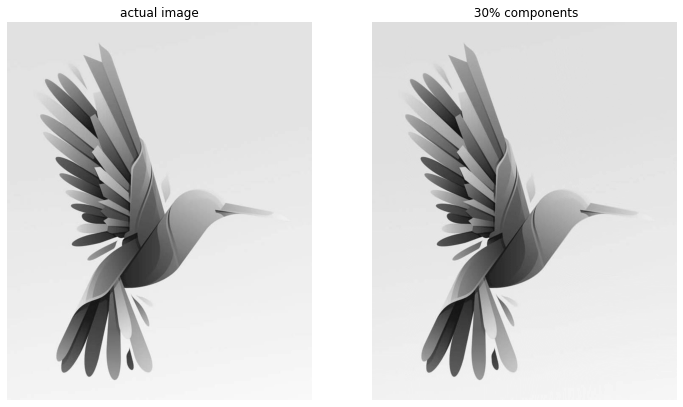

In [21]:
fig, [ax0,ax6] = plt.subplots(1,2,figsize=(12,10))

ax0.axis('off')
ax0.imshow(grayscale_matrix,cmap=plt.get_cmap('gray'))
ax0.set_title('actual image')

ax6.axis('off')
ax6.imshow(img6,cmap=plt.get_cmap('gray'))
ax6.set_title(' 30% components')

plt.savefig("30% components")
plt.show()

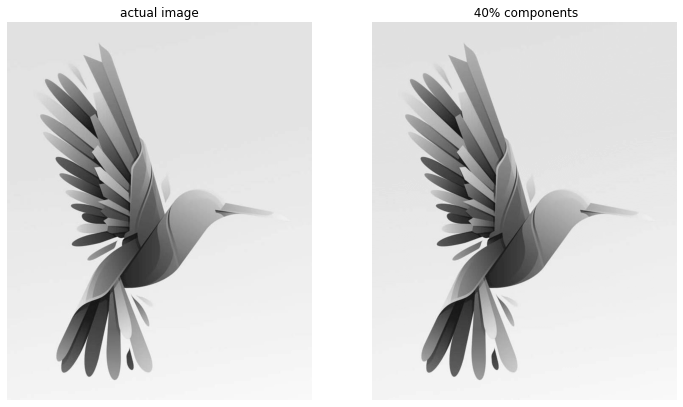

In [22]:
fig, [ax0,ax7] = plt.subplots(1,2,figsize=(12,10))

ax0.axis('off')
ax0.imshow(grayscale_matrix,cmap=plt.get_cmap('gray'))
ax0.set_title('actual image')

ax7.axis('off')
ax7.imshow(img7,cmap=plt.get_cmap('gray'))
ax7.set_title(' 40% components')

plt.savefig("40% components")
plt.show()